In [ ]:
# Install simpy
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Model an ATM where a customer arrives. 
# He spends 30 seconds to enter his details (such as PIN and amount) 
# and it takes another 60 seconds to get the cash.

In [ ]:
# Import simpy
import simpy
import random

CUST_INTER_ARR_TIME = 2 * 60 # 2 minutes

# Create simpy Environment
env = simpy.Environment()

# Create customer process
def customer(env, name):
  print(f'{name}: Arrives at time {env.now:.2f}')
  yield env.timeout(30) # wait for 30 seconds to enter the details
  print(f'{name}: Details entered by time {env.now:.2f}')
  yield env.timeout(60) # wait for 60 seconds to get the cash
  print(f'{name}: Cash retrieved at time {env.now:.2f}')

# Create customers
def customer_generator(env, cust_inter_arr_time):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}'))
    # Increment customer number
    cust_number += 1

random.seed(2)      

# Run the process
env.process(customer_generator(env=env, cust_inter_arr_time=CUST_INTER_ARR_TIME))

# Run the environment(simulation)
env.run(until=10*60) # run for 10 minutes

customer 1: Arrives at time 120.00
customer 1: Details entered by time 150.00
customer 1: Cash retrieved at time 210.00
customer 2: Arrives at time 240.00
customer 2: Details entered by time 270.00
customer 2: Cash retrieved at time 330.00
customer 3: Arrives at time 360.00
customer 3: Details entered by time 390.00
customer 3: Cash retrieved at time 450.00
customer 4: Arrives at time 480.00
customer 4: Details entered by time 510.00
customer 4: Cash retrieved at time 570.00


In [ ]:
# Import simpy
import simpy
import random

# Create simpy Environment
env = simpy.Environment()

# Create customer process
def customer(env, name):
  print(f'{name}: Arrives at time {env.now:.2f}')
  yield env.timeout(30) # wait for 30 seconds to enter the details
  print(f'{name}: Details entered by time {env.now:.2f}')
  yield env.timeout(60) # wait for 60 seconds to get the cash
  print(f'{name}: Cash retrieved at time {env.now:.2f}')

# Create customers
def customer_generator(env, cust_inter_arr_time):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)
    
    # wait for customer interarrival time (stochastic)
    cust_inter_arr_time = random.uniform(1,3) * 60

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}'))
    # Increment customer number
    cust_number += 1

random.seed(2)      

# Run the process
env.process(customer_generator(env=env, cust_inter_arr_time=CUST_INTER_ARR_TIME))

# Run the environment(simulation)
env.run(until=10*60) # run for 10 minutes

customer 1: Arrives at time 174.72
customer 1: Details entered by time 204.72
customer 1: Cash retrieved at time 264.72
customer 2: Arrives at time 348.46
customer 2: Details entered by time 378.46
customer 3: Arrives at time 415.25
customer 2: Cash retrieved at time 438.46
customer 3: Details entered by time 445.25
customer 4: Arrives at time 485.43
customer 3: Cash retrieved at time 505.25
customer 4: Details entered by time 515.43
customer 4: Cash retrieved at time 575.43


In [ ]:
# Import simpy
import simpy
import random

# Create customer process
def customer(env, name, atm):
  print(f'{name}: Arrives at time {env.now:.2f}')
  # Request an atm
  atm_req = atm.request()
  yield atm_req
  print(f'{name}: gets ATM machine at time {env.now:.2f}')
  yield env.timeout(30) # wait for 30 seconds to enter the details
  print(f'{name}: Details entered by time {env.now:.2f}')
  yield env.timeout(60) # wait for 60 seconds to get the cash
  print(f'{name}: Cash retrieved at time {env.now:.2f}')
  atm.release(atm_req)

  

# # Create customer process
# def customer(env, name, atm):
#   print(f'{name}: Arrives at time {env.now:.2f}')
#   # Request an atm
#   with atm.request() as atm_req:
#     # wait till you get an ATM
#     yield atm_req
#     print(f'{name}: gets ATM machine at time {env.now:.2f}')
#     yield env.timeout(30) # wait for 30 seconds to enter the details
#     print(f'{name}: Details entered by time {env.now:.2f}')
#     yield env.timeout(60) # wait for 60 seconds to get the cash
#     print(f'{name}: Cash retrieved at time {env.now:.2f}')

# Create customers
def customer_generator(env, cust_inter_arr_time, atm):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)
    
    # wait for customer interarrival time (stochastic)
    cust_inter_arr_time = random.uniform(1,3) * 60

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    # Increment customer number
    cust_number += 1

random.seed(2)   

# Create simpy Environment
env = simpy.Environment()

# create atm resource with capacity = 1
atm = simpy.Resource(env=env, capacity=1)

# Run the process
env.process(customer_generator(env=env, cust_inter_arr_time=CUST_INTER_ARR_TIME, atm=atm))

# Run the environment(simulation)
env.run(until=10*60) # run for 10 minutes

customer 1: Arrives at time 174.72
customer 1: gets ATM machine at time 174.72
customer 1: Details entered by time 204.72
customer 1: Cash retrieved at time 264.72
customer 2: Arrives at time 348.46
customer 2: gets ATM machine at time 348.46
customer 2: Details entered by time 378.46
customer 3: Arrives at time 415.25
customer 2: Cash retrieved at time 438.46
customer 3: gets ATM machine at time 438.46
customer 3: Details entered by time 468.46
customer 4: Arrives at time 485.43
customer 3: Cash retrieved at time 528.46
customer 4: gets ATM machine at time 528.46
customer 4: Details entered by time 558.46


## Data analysis

In [ ]:
# Import simpy
import simpy
import random
import numpy as np 

# Simulation parameters
SIM_TIME = 24*60*60 # run for 24 hours entered in seconds
WARMUP_TIME = 1*60*60 # Warmup of 1 hour

# Statistics collection
ct_simulation = [] # cycle time for simulation
ct_replication = [] # cycle time for iteration/replication
waiting_time_simulation = []
waiting_time_replication = []

throughput_simulation = [] # throughput for simulation




# Create customer process
def customer(env, name, atm):
  # print(f'{name}: Arrives at time {env.now:.2f}')
  customer_enter_time = env.now
  # Request an atm
  with atm.request() as atm_req:
    # wait till you get an ATM
    yield atm_req
    customer_got_atm = env.now
    # print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30) # wait for 30 seconds to enter the details
    # print(f'{name}: Details entered by time {env.now:.2f}')
    yield env.timeout(60) # wait for 60 seconds to get the cash
    # print(f'{name}: Cash retrieved at time {env.now:.2f}')
  # Collect statistics
  if env.now > WARMUP_TIME:
    waiting_time_replication.append(customer_got_atm-customer_enter_time)
    ct_replication.append(env.now - customer_enter_time)

# Create customers
def customer_generator(env, atm):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)
    
    # wait for customer interarrival time (stochastic)
    cust_inter_arr_time = random.uniform(1,3)*60 # in seconds

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    # Increment customer number
    cust_number += 1


# Running simulation ten times
for r in range(50):

  # Set random seed for reproducibility\
  random.seed(r)

  # Create simpy Environment
  env = simpy.Environment()

  # create atm resource with capacity = 1
  atm = simpy.Resource(env=env, capacity=1)

  # Run the process
  env.process(customer_generator(env=env, atm=atm))

  # Run the environment(simulation)
  env.run(until=SIM_TIME) # run for 8 hours  

  # Collect data from this iteration
  ct_simulation.append(np.mean(ct_replication))
  waiting_time_simulation.append(np.mean(waiting_time_replication))
  num_customers = len(ct_replication) # count of ct_replication lets us know how many customers have passed
  throughput_simulation.append(num_customers/(SIM_TIME))

  # Clear the data by reintializing
  ct_replication = [] # cycle time for iteration/replication
  waiting_time_replication = []

# Summary
print(f'Average Cycle time: {np.mean(ct_simulation)/60:.2f} minutes +/- {np.std(ct_simulation)/60:.2f}')
print(f'Average Waiting time: {np.mean(waiting_time_simulation)/60:.2f} minutes +/- {np.std(waiting_time_simulation)/60:.2f}')
print(f'AverageThroughput rate: {np.mean(throughput_simulation)*60*60:.2f} customers/hour +/- {np.std(throughput_simulation)*60*60:.2f}')

Average Cycle time: 1.61 minutes +/- 0.02
Average Waiting time: 0.11 minutes +/- 0.02
AverageThroughput rate: 28.76 customers/hour +/- 0.34


## Not reqd

Now, let's find out how the system behaves with variation to the arrival rate

The processing time of 1.5 minutes will remain the same. The inter-arrival time will vary between 0.5 and 5 minutes.

In [ ]:
# Import simpy
import simpy
import random
import numpy as np 

# Simulation parameters
SIM_TIME = 8*60*60 # run for 8 hours entered in seconds


# Statistics collection
ct_simulation = [] # cycle time for simulation
tput_simulation = [] # throughput for simulation
customer_enter_time = {} # dictionary to collect data based on customer number
ct_iteration = [] # cycle time for iteration/replication

# Arrival time
arr_time = [0.5*i for i in range(1,11)]
ct_arr = [] # cycle time for varying arrivals
tput_arr = [] # thrughput for varing arrivals

# Create customer process
def customer(env, name, atm):
  # print(f'{name}: Arrives at time {env.now:.2f}')
  customer_enter_time[name] = env.now
  # Request an atm
  with atm.request() as atm_req:
    # wait till you get an ATM
    yield atm_req
    # print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30) # wait for 30 seconds to enter the details
    # print(f'{name}: Details entered by time {env.now:.2f}')
    yield env.timeout(60) # wait for 60 seconds to get the cash
    # print(f'{name}: Cash retrieved at time {env.now:.2f}')
  # Collect statistics
  ct_iteration.append(env.now - customer_enter_time[name])

# Create customers
def customer_generator(env, atm, arr):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)
    
    # wait for customer interarrival time (stochastic)
    cust_inter_arr_time = random.uniform(0.5,arr) * 60 # in seconds

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    # Increment customer number
    cust_number += 1

for arr in arr_time:
  # Running simulation ten times
  for r in range(50):

    # Set random seed for reproducibility\
    random.seed(r)

    # Create simpy Environment
    env = simpy.Environment()

    # create atm resource with capacity = 1
    atm = simpy.Resource(env=env, capacity=1)

    # Run the process
    env.process(customer_generator(env=env, atm=atm, arr=arr))

    # Run the environment(simulation)
    env.run(until=SIM_TIME) # run for 8 hours  

    # Collect data from this iteration
    ct_simulation.append(np.mean(ct_iteration))
    num_customers = len(ct_iteration) # count of ct_iteration lets us know how many customers have passed
    tput_simulation.append(num_customers/(SIM_TIME))

    # Clear the data by reintializing
    customer_enter_time = {} # dictionary to collect data based on customer number
    ct_iteration = [] # cycle time for iteration/replication
  # Collect data for the current arr
  ct_arr.append(np.mean(ct_simulation)/60)
  tput_arr.append(np.mean(tput_simulation)*60)

  #Clear data
  ct_simulation=[]
  tput_simulation=[]


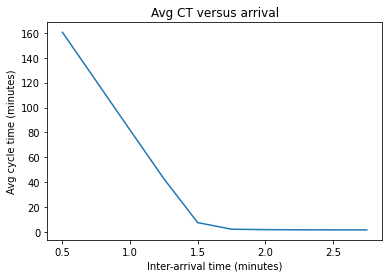

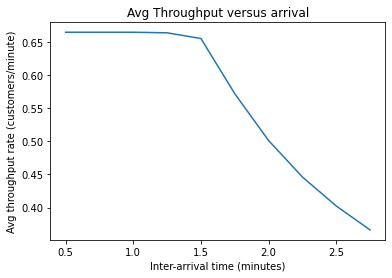

In [ ]:
# Plot
import matplotlib.pyplot as plt
avg_arr = [(0.5+i)/2 for i in arr_time]
plt.plot(avg_arr,ct_arr)
plt.title(f'Avg CT versus arrival')
plt.xlabel(f'Inter-arrival time (minutes)')
plt.ylabel(f'Avg cycle time (minutes)')
plt.show()
plt.plot(avg_arr,tput_arr)
plt.title(f'Avg Throughput versus arrival')
plt.xlabel(f'Inter-arrival time (minutes)')
plt.ylabel(f'Avg throughput rate (customers/minute)')
plt.show()

To discuss the results, lets consider three cases:
1. Arrival-time > Processing time: i.e., inter-arrival times are greater than 1.5 inutes. In this case, we see that cycle time is always at 1.5 minutes and throughput rate is equal to arrival rate which is inverse of inter-arival time
2. Arrival-time = Processing time: CT is at 1.5 minutes and throughput rate = arrival rate
3. Arrival time < Processing time: i.e., customers arrive faster. In this case we see that the cycle time explodes because a lot of customer are waiting. And the throughput rate is constantly 0.66. Why does this happen? Because the processing time takes 1.5 minutes for every customer, it acts as a bottleneck and causes the throughput to remain at 0.66 customers/minute.

## To handle this bottleneck issue, increase resources to 2

scenario remains the same
1. arrival uniform between 0 and 1 minutes
2. processing time is deterministic 1.5 minutes

In [ ]:
  # Import simpy
  import simpy
  import random
  import numpy as np 

  # Simulation parameters
  SIM_TIME = 24*60*60 # run for 24 hours entered in seconds
  WARMUP_TIME = 1*60*60 # Warmup of 1 hour

  # Statistics collection
  ct_simulation = [] # cycle time for simulation
  ct_replication = [] # cycle time for iteration/replication
  waiting_time_simulation = []
  waiting_time_replication = []

  throughput_simulation = [] # throughput for simulation

  num_atms = [1,2,3,4,5,6]
  ct_atms = []
  throughput_atms = []


  # Create customer process
  def customer(env, name, atm):
    # print(f'{name}: Arrives at time {env.now:.2f}')
    customer_enter_time = env.now
    # Request an atm
    with atm.request() as atm_req:
      # wait till you get an ATM
      yield atm_req
      customer_got_atm = env.now
      # print(f'{name}: gets ATM machine at time {env.now:.2f}')
      yield env.timeout(30) # wait for 30 seconds to enter the details
      # print(f'{name}: Details entered by time {env.now:.2f}')
      yield env.timeout(60) # wait for 60 seconds to get the cash
      # print(f'{name}: Cash retrieved at time {env.now:.2f}')
    # Collect statistics
    if env.now > WARMUP_TIME:
      waiting_time_replication.append(customer_got_atm-customer_enter_time)
      ct_replication.append(env.now - customer_enter_time)

  # Create customers
  def customer_generator(env, atm):
    cust_number = 1
    while True:
      # wait for customer interarrival time (deterministic)
      
      # wait for customer interarrival time (stochastic)
      cust_inter_arr_time = random.uniform(0,1)*60 # in seconds

      yield env.timeout(cust_inter_arr_time)
      # create a customer process
      env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
      # Increment customer number
      cust_number += 1


  for atm_cap in num_atms:
    # Running simulation ten times
    for r in range(50):

      # Set random seed for reproducibility\
      random.seed(r)

      # Create simpy Environment
      env = simpy.Environment()

      # create atm resource with capacity = 1
      atm = simpy.Resource(env=env, capacity=atm_cap)

      # Run the process
      env.process(customer_generator(env=env, atm=atm))

      # Run the environment(simulation)
      env.run(until=SIM_TIME) # run for 8 hours  

      # Collect data from this iteration
      ct_simulation.append(np.mean(ct_replication))
      waiting_time_simulation.append(np.mean(waiting_time_replication))
      num_customers = len(ct_replication) # count of ct_replication lets us know how many customers have passed
      throughput_simulation.append(num_customers/(SIM_TIME))

      # Clear the data by reintializing
      ct_replication = [] # cycle time for iteration/replication
      waiting_time_replication = []

    # Collect data per atm
    ct_atms.append(np.mean(ct_simulation)/60)
    throughput_atms.append(np.mean(throughput_simulation)*60*60)
    ct_simulation = []
    throughput_simulation = []



###Archive

In [ ]:
# Import simpy
import simpy
import random
import numpy as np 

# Simulation parameters
SIM_TIME = 24*60*60 # run for 8 hours entered in seconds


# Statistics collection
ct_simulation = [] # cycle time for simulation
tput_simulation = [] # throughput for simulation
customer_enter_time = {} # dictionary to collect data based on customer number
ct_iteration = [] # cycle time for iteration/replication

# Reosurces
num_atms = [1,2,3,4,5,6]
ct_atms = [] # cycle time for varying arrivals
tput_atms = [] # thrughput for varing arrivals

# Create customer process
def customer(env, name, atm):
  # print(f'{name}: Arrives at time {env.now:.2f}')
  customer_enter_time = env.now
  # Request an atm
  with atm.request() as atm_req:
    # wait till you get an ATM
    yield atm_req
    # print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30) # wait for 30 seconds to enter the details
    # print(f'{name}: Details entered by time {env.now:.2f}')
    yield env.timeout(60) # wait for 60 seconds to get the cash
    # print(f'{name}: Cash retrieved at time {env.now:.2f}')
  # Collect statistics after warmup time
  ct_iteration.append(env.now - customer_enter_time)

# Create customers
def customer_generator(env, atm):
  cust_number = 1
  while True:
    # wait for customer interarrival time (deterministic)
    
    # wait for customer interarrival time (stochastic)
    cust_inter_arr_time = random.uniform(0,1)*60 # in seconds

    yield env.timeout(cust_inter_arr_time)
    # create a customer process
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    # Increment customer number
    cust_number += 1

for atm_cap in num_atms:
  # Running simulation ten times
  for r in range(50):

    # Set random seed for reproducibility\
    random.seed(r)

    # Create simpy Environment
    env = simpy.Environment()

    # create atm resource with capacity = 1
    atm = simpy.Resource(env=env, capacity=atm_cap)

    # Run the process
    env.process(customer_generator(env=env, atm=atm))

    # Run the environment(simulation)
    env.run(until=SIM_TIME) # run for 8 hours  

    # Collect data from this iteration
    ct_simulation.append(np.mean(ct_iteration))
    num_customers = len(ct_iteration) # count of ct_iteration lets us know how many customers have passed
    tput_simulation.append(num_customers/(SIM_TIME))

    # Clear the data by reintializing
    customer_enter_time = {} # dictionary to collect data based on customer number
    ct_iteration = [] # cycle time for iteration/replication
  # Collect data for the current arr
  ct_atms.append(np.mean(ct_simulation)/60)
  tput_atms.append(np.mean(tput_simulation)*60)

  #Clear data
  ct_simulation=[]
  tput_simulation=[]


### Graphs

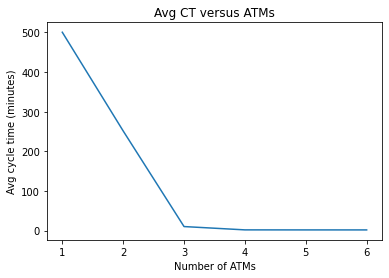

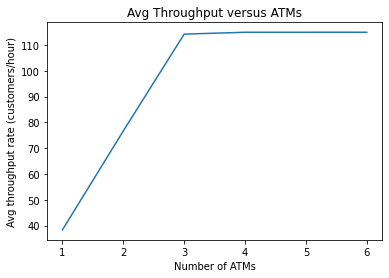

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.plot(num_atms,ct_atms)
plt.title(f'Avg CT versus ATMs')
plt.xlabel(f'Number of ATMs')
plt.ylabel(f'Avg cycle time (minutes)')
plt.show()
plt.plot(num_atms,throughput_atms)
plt.title(f'Avg Throughput versus ATMs')
plt.xlabel(f'Number of ATMs')
plt.ylabel(f'Avg throughput rate (customers/hour)')
plt.show()

ValueError: ignored